In [14]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib as mt

dataset = pd.read_csv("042/labor.csv", delimiter="\t")
dataset.drop(dataset.columns[0], axis=1, inplace=True)
dataset

,name,hematokrit,smoker,leukocyty,relationship,ssn,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
0,Courtney Sparks,5.10789,no,3.67594,married,211-15-5030,1.36076,65.50748,7.92270,80.65839,40.27331,46.67907,6.93084,7.07385,2.43339,0.0,6.73439
1,David Cook,6.06717,no,6.61722,divoced,134-25-6459,1.10335,80.56053,7.13748,95.49950,51.14865,21.09764,6.17378,6.30636,3.16922,0.0,6.69188
2,Diane Dunn,NaN,no,8.84155,married,410-38-6674,2.32670,165.53795,8.77005,88.36972,56.40210,28.48174,7.23321,6.44218,6.13313,0.0,6.33770
3,Debra Cameron,8.52161,Y,8.76540,married,327-02-6401,3.08378,56.12232,9.11128,57.21363,57.61393,67.05110,7.25101,7.74219,5.54453,0.0,6.08754
4,Vincent Mccullough,4.35962,no,6.61320,divoced,469-50-8029,5.08135,93.52107,9.68805,82.12788,75.41991,53.04260,6.18335,5.69975,5.34519,0.0,6.34100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,Kenneth Sanchez,4.67432,N,5.22478,married,035-07-2574,0.75385,4.79395,7.40597,80.98445,42.89142,47.93544,5.69357,6.46889,4.59180,0.0,6.23398
10035,Jennifer Franklin,5.38144,Y,6.77403,widowed,369-05-1763,0.68170,72.43763,7.38835,88.27656,55.07674,43.86325,5.33810,6.04664,8.02259,1.0,7.56910
10036,Valerie Carter,3.16568,Y,6.30583,married,546-10-0083,0.49297,26.26844,6.22727,49.46443,56.32268,59.28561,8.32349,4.43833,9.62061,1.0,7.53199
10037,Julie Newman,4.80303,Y,6.78358,widowed,556-01-2815,1.92676,57.92751,8.64693,44.97615,53.85140,56.17723,7.25014,8.14832,6.77935,1.0,4.97849


In [15]:
profiles = len(dataset.index)
attributes = len(dataset.columns)
data = [[profiles], [attributes]]
sum_of_dataset = pd.DataFrame(data, columns = ['Number'], index = ['Profiles','Attributes'])
sum_of_dataset.style

,Number
Profiles,10039
Attributes,17


In [16]:
info = pd.DataFrame(dataset.dtypes)
info = info.set_axis(['Dtype'], axis=1, inplace=False)
info.style


,Dtype
name,object
hematokrit,float64
smoker,object
leukocyty,float64
relationship,object
ssn,object
alt,float64
weight,float64
erytrocyty,float64
alp,float64


array([[<AxesSubplot:title={'center':'hematokrit'}>,
        <AxesSubplot:title={'center':'leukocyty'}>,
        <AxesSubplot:title={'center':'alt'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'erytrocyty'}>,
        <AxesSubplot:title={'center':'alp'}>,
        <AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'er-cv'}>],
       [<AxesSubplot:title={'center':'etytr'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>,
        <AxesSubplot:title={'center':'trombocyty'}>,
        <AxesSubplot:title={'center':'indicator'}>],
       [<AxesSubplot:title={'center':'hbver'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

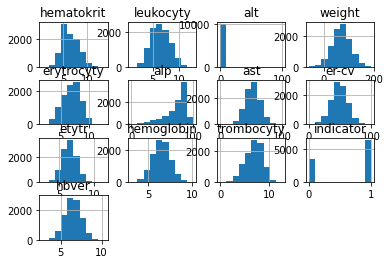

In [17]:
# dataset.head()
dataset.hist()

In [18]:
# dataset.head()
desc_stat_table = dataset.select_dtypes(include=[np.float64])
# desc_stat = pd.DataFrame(columns= desc_stat_table.columns)
desc_stat = dataset.describe()
# desc_stat.loc['Mean'] = desc_stat_table.mean()
desc_stat.loc['median'] = desc_stat_table.median()
# modus nie je mozne urobit, nie su jednoznacne
desc_stat

# desc_stat


,hematokrit,leukocyty,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
count,10008.000000,10009.000000,10009.000000,10039.000000,10009.000000,10008.000000,10009.000000,10009.000000,10008.000000,10009.000000,10009.00000,10039.000000,10009.000000
mean,6.453032,6.450274,1.306090,69.805192,6.898802,71.949719,52.343359,49.060376,6.476717,6.464414,6.82846,0.642295,6.475601
std,1.665991,1.700428,2.080683,35.581044,1.605785,18.109229,11.880597,13.084279,0.994156,1.006072,1.73433,0.479349,1.004527
min,0.683890,0.979140,0.000000,-59.892790,1.811270,0.000000,0.000000,0.000000,2.678710,3.054200,0.00000,0.000000,2.738210
25%,5.197180,5.177990,0.521560,46.183730,5.748830,63.818647,44.490180,40.393810,5.802672,5.786020,5.66519,0.000000,5.806840
50%,6.227605,6.352150,0.773820,70.018130,7.036180,78.203065,52.376590,48.923340,6.480035,6.476210,7.00289,1.000000,6.478430
75%,7.669982,7.693890,1.344220,93.175640,8.052080,84.986902,60.275100,57.766910,7.147997,7.140870,8.07872,1.000000,7.147590
max,13.633550,12.694630,100.000000,188.436090,12.733320,100.000000,100.000000,100.000000,11.426920,10.112330,12.59522,1.000000,10.361820
median,6.227605,6.352150,0.773820,70.018130,7.036180,78.203065,52.376590,48.923340,6.480035,6.476210,7.00289,1.000000,6.478430


,hematokrit,smoker,leukocyty,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
hematokrit,1.000000,0.017147,-0.040439,-0.202903,0.015700,-0.456355,-0.001020,-0.003781,0.013188,-0.000809,-0.035777,-0.028036,0.000446,-0.000841
smoker,0.017147,1.000000,-0.011030,0.005596,-0.007906,0.019994,-0.011707,-0.031520,-0.004466,-0.016928,0.012400,-0.007948,-0.033712,0.015441
leukocyty,-0.040439,-0.011030,1.000000,0.190637,-0.049874,0.338619,0.026516,0.002257,0.000258,0.004422,-0.021884,0.151289,-0.004218,-0.015626
alt,-0.202903,0.005596,0.190637,1.000000,0.000597,0.610118,0.006391,0.007320,0.015720,0.013816,0.023969,-0.265341,-0.083435,-0.012994
weight,0.015700,-0.007906,-0.049874,0.000597,1.000000,-0.009656,0.010837,-0.000215,-0.002990,0.013585,-0.005469,-0.010711,-0.020516,-0.010602
erytrocyty,-0.456355,0.019994,0.338619,0.610118,-0.009656,1.000000,-0.000341,0.012523,0.020172,0.003957,0.035591,-0.344615,-0.314498,0.001416
alp,-0.001020,-0.011707,0.026516,0.006391,0.010837,-0.000341,1.000000,0.005116,-0.010876,0.001370,-0.209383,0.000847,0.005014,-0.019893
ast,-0.003781,-0.031520,0.002257,0.007320,-0.000215,0.012523,0.005116,1.000000,0.016697,0.004517,0.005663,-0.013625,-0.012598,0.015069
er-cv,0.013188,-0.004466,0.000258,0.015720,-0.002990,0.020172,-0.010876,0.016697,1.000000,0.004224,-0.004062,-0.021827,-0.020606,0.009593
etytr,-0.000809,-0.016928,0.004422,0.013816,0.013585,0.003957,0.001370,0.004517,0.004224,1.000000,0.011519,-0.007924,-0.029444,0.003968


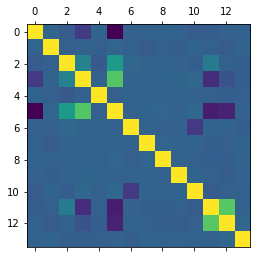

In [24]:
"""Parova analyza dat"""

correllation = dataset.corr()
mt.pyplot.matshow(correllation)
correllation.style.background_gradient(cmap='coolwarm')
# dataset.corr()



In [20]:
"""Identifikacia problemov"""
dataset = dataset.dropna()
# dataset.head()
smoker_series = dataset['smoker']
replacement_dict = {
    "Y": True,
    "yes": True,
    "N": False,
    "no": False
}
dataset["smoker"].replace(replacement_dict, inplace=True)
dataset["relationship"].replace("divoced","divorced",inplace=True)
dataset.drop_duplicates(subset='name', inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset.head()
# print(smoker_series.unique())

C:\Users\szacs\PycharmProjects\IAU\venv\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\szacs\PycharmProjects\IAU\venv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,name,hematokrit,smoker,leukocyty,relationship,ssn,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
0,Courtney Sparks,5.10789,False,3.67594,married,211-15-5030,1.36076,65.50748,7.92270,80.65839,40.27331,46.67907,6.93084,7.07385,2.43339,0.0,6.73439
1,David Cook,6.06717,False,6.61722,divorced,134-25-6459,1.10335,80.56053,7.13748,95.49950,51.14865,21.09764,6.17378,6.30636,3.16922,0.0,6.69188
2,Debra Cameron,8.52161,True,8.76540,married,327-02-6401,3.08378,56.12232,9.11128,57.21363,57.61393,67.05110,7.25101,7.74219,5.54453,0.0,6.08754
3,Vincent Mccullough,4.35962,False,6.61320,divorced,469-50-8029,5.08135,93.52107,9.68805,82.12788,75.41991,53.04260,6.18335,5.69975,5.34519,0.0,6.34100
4,Lauren Harris,5.32524,True,6.52586,divorced,755-50-6094,0.89996,57.01768,7.78640,80.50126,44.08776,60.41555,5.33112,6.68497,7.49621,1.0,6.88636


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2986 entries, 0 to 2985
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2986 non-null   object 
 1   hematokrit    2986 non-null   float64
 2   smoker        2986 non-null   bool   
 3   leukocyty     2986 non-null   float64
 4   relationship  2986 non-null   object 
 5   ssn           2986 non-null   object 
 6   alt           2986 non-null   float64
 7   weight        2986 non-null   float64
 8   erytrocyty    2986 non-null   float64
 9   alp           2986 non-null   float64
 10  ast           2986 non-null   float64
 11  er-cv         2986 non-null   float64
 12  etytr         2986 non-null   float64
 13  hemoglobin    2986 non-null   float64
 14  trombocyty    2986 non-null   float64
 15  indicator     2986 non-null   float64
 16  hbver         2986 non-null   float64
dtypes: bool(1), float64(13), object(3)
memory usage: 376.3+ KB


In [22]:
# Second dataset

dataprofiles = pd.read_csv("042/profiles.csv", delimiter="\t")
dataprofiles.drop(dataprofiles.columns[0], axis=1, inplace=True)
dataprofiles.drop_duplicates(subset="name", inplace=True)
dataprofiles['birthdate'] = pd.to_datetime(dataprofiles['birthdate'])
dataprofiles.dropna(inplace=True)
dataprofiles


,blood_group,company,job,ssn,sex,birthdate,race,name,address
0,A-,Yu Group,"Engineer, energy",383-82-1198,M,1946-08-10,White,John Beard,"2896 Juan Manor\nNorth Douglasmouth, LA 50163"
1,O-,"Chase, Brown and Price","Designer, furniture",828-02-1024,M,1933-01-31,Black,Dustin Oneal,"225 Moore Glen Suite 019\nAmandastad, WA 64166"
2,O+,"Martinez, Medina and Myers",Medical technical officer,604-55-3198,F,1989-11-29,Hawaiian,Rachel Brown,"51910 Timothy Lane\nHorneburgh, DE 96504"
3,O-,Odonnell-Weber,Neurosurgeon,235-52-1947,M,1975-10-07,Black,Robert Johnson,5654 Kimberly Points Suite 971\nSouth Robinshi...
4,O-,Velazquez Ltd,Homeopath,160-55-3346,F,1934-06-16,White,Stephanie Rodriguez,"25985 Kyle Terrace\nPamelaland, CA 64245"
...,...,...,...,...,...,...,...,...,...
3055,O-,"Ramirez, Chambers and Lee",Multimedia specialist,129-93-9411,M,2010-08-23,Black,Adam Owens,"798 Brown Centers\nWest Kristin, AL 16008"
3056,O-,"Bennett, Porter and Diaz","Nurse, learning disability",073-31-8151,F,2013-03-15,Black,Pamela Tapia MD,"328 Sanchez River Suite 664\nSolishaven, CA 16716"
3057,O-,Ward Group,Town planner,496-75-4226,F,1916-07-28,Black,Crystal Anderson,Unit 0796 Box 7005\nDPO AA 92880
3058,O+,Jenkins-Turner,"Administrator, arts",895-70-8728,F,1928-02-29,Asian,Emily Walker,"574 James Crossroad Suite 057\nDeanfort, WY 09541"
